# 3 基本的な処理

## 3.1 準備

### この節について

この節ではまずRAW画像を準備し、簡易的なデモザイクを行ってみます。

この節のの内容はColabノートブックとして公開してあります。ノートブックを見るには[目次ページ](http://bit.ly/raw_toc))から参照するか、以下のリンクを使ってアクセスしてください。

http://bit.ly/raw_chap_3

### RAW画像の準備

まずRAW画像を用意します。今回はラズベリーパイで撮影したこの画像を使います[^1]。

[^1]: 撮影方法は付録１で解説します。

  ![チャート画像](https://github.com/moizumi99/camera_raw_processing/raw/master/Figures/chart_small.jpg "チャート画像")

元になるRAWファイルはこのURLにあります。

https://github.com/moizumi99/camera_raw_processing/raw/master/Figures/chart.jpg

拡張子はJPGになっていて実際にJPEG画像としても表示できますが、データ中にRAW画像が埋め込まれています。

では、colab上にダウンロードしてみましょう。colabでは行の最初に!をつけることでLinuxのコマンドが実行できます。

In [0]:
!if [ ! -f chart.jpg ]; then wget https://github.com/moizumi99/camera_raw_processing/raw/master/chart.jpg; fi

自分で撮影したRAWデータを使用する場合は次のコマンド利用してください。

In [0]:
# from google.colab import files
# uploaded = files.upload()

使いやすいようにRAWファイル名を変数に保存しておきます。

自分でアップロードしたファイルを使用する場合は、ファイル名を対象のファイルに書き換えてください。

In [0]:
raw_file  = "chart.jpg"

### RAW画像の読み込み

まず必用なモジュールをインストールします。

まずインストールするのはrawpyです。

rawpyはpythonでRAW画像を操作するためのモジュールです[^2]。

[^2]: https://pypi.org/project/rawpy/

rawpyを使うとRAW画像からRAW画像データを取り出したり、画像サイズなどのパラメータを読み出したり、また簡易現像をすることができます。

rawpyの使用法については実際に使う時に説明します。

In [4]:
!pip install rawpy

pipはpythonのモジュール管理用のコマンドです。

次にimageioをインストールします。

imageioは画像の表示やロード・セーブなどを行うモジュールです。

In [5]:
!pip install imageio

次にこれらのモジュールをインポートします。

In [0]:
import rawpy, imageio

他に必用なモジュールがある場合はその都度importすることにします。

では先程ダウンロードしたRAWファイルをrawpyを使って読み出してみましょう。

`imread()`はrawデータをファイルから読み込むrawpyのメソッドです。

In [0]:
raw = rawpy.imread(raw_file)

読み込みがうまくいったか確認を兼ねてRAWデータの情報を見てみましょう。

まず、画像サイズを確認します。読み込んだRAWデータは、sizesというアトリビュートでサイズ確認ができます。

In [8]:
print(raw.sizes)

ImageSizes(raw_height=2464, raw_width=3280, height=2464, width=3280, top_margin=0, left_margin=0, iheight=2464, iwidth=3280, pixel_aspect=1.0, flip=0)


raw_heightとraw_widthはRAWデータのサイズです。この画像のサイズは縦2464ライン、横3280画素、ということになります。

heightとwidthは、画像処理後の出力画像のサイズです。

他の値についてはrawpyのページで解説されています。

https://letmaik.github.io/rawpy/api/rawpy.RawPy.html#rawpy.RawPy.sizes

この画像を処理しやすくするために、numpyを使用します。

numpyはpython用の数値計算ライブラリーです。行列処理の機能が豊富なので画像処理にも向いています。

まず、numpyをnpという名前でインポートします。

In [0]:
import numpy as np

次にraw画像データから数値データのみをnumpyの配列に読み込みます。

In [0]:
# raw_imageはrawpyのアトリビュート。numpyの配列を返す。
raw_array = raw.raw_image

raw_imageはRAW画像データをnumpyの配列して渡すアトリビュートです。

縦横の大きさを取得しておきます。

In [11]:
h, w = raw_array.shape
print(h, w)

2464 3280


これでraw_arrayは2464 x 3280の２次元配列になりました。
画像データを表示するコマンドimshowを使って、画像として確認してみましょう。

まずキャプション用に日本語フォントを用意します。

In [12]:
# 日本語フォントをインストール
!apt -y install fonts-ipafont-gothic

# 画像表示用ライブラリpyplotのインポート。
import matplotlib.pyplot as plt
# 日本語フォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


実際に画像を表示します。

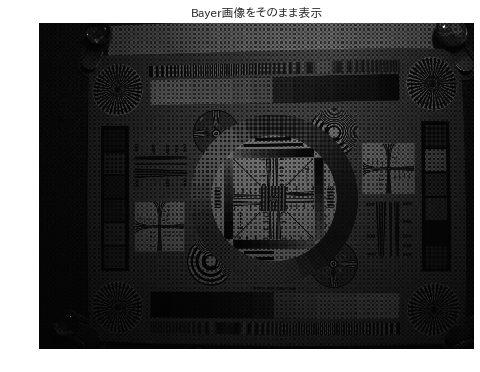

In [13]:
# 画像表示サイズを設定。figsizeの中身は横サイズ、縦サイズ。
# 単位はインチだが実際の表示サイズはディスプレイ解像度によって異なる。
plt.figure(figsize=(8, 6))
# raw_arrayの中のデータをグレースケールで表示します。
plt.imshow(raw_array, cmap='gray')
# 軸を非表示にします。
plt.axis('off')
# 画像タイトルの設定
plt.title(u"Bayer画像をそのまま表示")
# 実際に表示します。
plt.show()

ここでmatplotlibはnumpy用描画ライブラリーです。その中でpyplotは各種グラフを表示するモジュールです。ここではpltという名前でインポートしています。

もし日本語のタイトルが文字化けしている場合は、

```bash
import matplotlib
target_dir = matplotlib.get_cachedir()
! rm {target_dir}/*.json
```

を実行して
Runtime->Restart Runtimeを選択したあとで、ページの最初から再実行してみてください。

文字化けを無視しても処理自体に支障はありません。

In [0]:
# もし日本語が文字化けしている場合次の3行の#を削除して実行。
# import matplotlib
# target_dir = matplotlib.get_cachedir()
# ! rm {target_dir}/*.json
# その後、Runtime->Restart and run allで再実行

### この節のまとめ

必用なモジュールをインポートしてRAW画像をcolab上に読み込みました。
次は簡易デモザイク処理を行います。

## 3.2 簡易デモザイク処理

### この節について

この節では、RAWデータの簡易でモザイク処理を行い、画像をフルカラーで表示してみます。

### RAW画像の確認

先程読み込んだRAW画像を拡大して見てみましょう。。

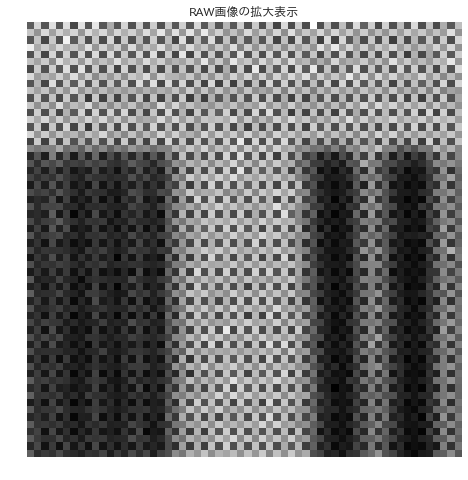

In [16]:
# pyplotのコマンドfigure()を使って表示サイズを調整.
# ここではfigsize=(8, 8)で、8inch x 8inchを指定（ただし実際の表示サイズはディスプレイ解像度に依存） 
plt.figure(figsize=(8, 8))

# RAW画像の中から(1310, 2620)から60x60の領域を表示。
plt.imshow(raw_array[1340:1400, 2640:2700], cmap='gray')
plt.axis('off')
plt.title(u"RAW画像の拡大表示")
plt.show()

明るいところが緑、暗いところが赤や青の画素のはずです

Bayerの画素と色の関係を直感的に理解するために、Bayerの赤の部分を赤、青を青、緑を緑で表示してみましょう。

まず、RAW画像の配列を確認しておきます。

In [17]:
print(raw.raw_pattern)

[[2 3]
 [1 0]]


raw_patternはrawpyのアトリビュートで、Bayer配列の2x2行列を示します。

ここで、各番号と色の関係は以下のようになっています。カッコ内は略称です

| 番号 | 色 |
|--------|-----|
| 0 | 赤 (R) |
| 1 | 緑 (Gr) |
| 2 | 青 (B) |
| 3 | 緑 (Gb) |

ここで緑にGrとGbがあるのは、赤の行の緑と青の行の緑を区別するためです。カメラ画像処理では両者を区別することが多々あり、両者をGrとGbと表す事があります。

両者を区別する必要が無い場合はどちらもGであらわします。


この対応関係を考えると、この画像の各画素の色は、左上から

赤　緑

緑　青

のように並んでいることがわかります。これを図示するとこうなります。


![この画像のBayer配列](https://github.com/moizumi99/camera_raw_processing/raw/master/Figures/fig1_bayer_bggr.png)

では、これに対応するRGB画像を作ってみましょう。

In [0]:
# raw_arrayと同じ大きさで、３色のデータを持つnumpyの行列を作る。
# zerosは指定された大きさの０行列を作るコマンド。
raw_color = np.zeros((h, w, 3))

# 偶数列、偶数行の画素は青なので、青チャンネル（2）にコピー。
raw_color[0::2, 0::2, 2] = raw_array[0::2, 0::2]
# 奇数列、偶数行の画素は緑なので、緑チャンネル（1）にコピー。
raw_color[0::2, 1::2, 1] = raw_array[0::2, 1::2]
# 偶数列、奇数行の画素は緑なので、緑チャンネル（1）にコピー。
raw_color[1::2, 0::2, 1] = raw_array[1::2, 0::2]
# 奇数列、奇数行の画素は赤なので、赤チャンネル(0）にコピー。
raw_color[1::2, 1::2, 0] = raw_array[1::2, 1::2]

# 0から1の範囲にノーマライズ
raw_color[raw_color < 0] = 0
raw_color = raw_color / 1024

最後に1024で割ったのはラズベリーパイのRAW画像は１０ビットだからです。１０ビットで表せる範囲の最大値は1023ですが、ここでは1024で正規化しています。

これでBayerに対応するRGB画像ができたはずです。表示してみましょう。

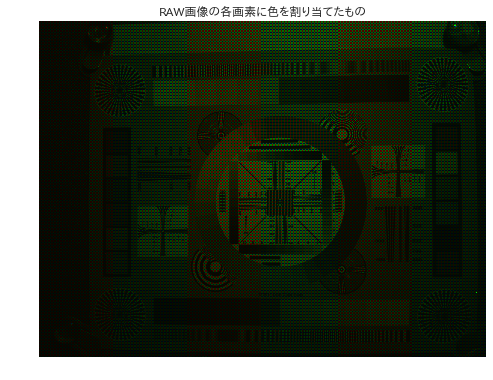

In [19]:
# RAW画像に色を割り振ったものを表示。
plt.figure(figsize=(8, 8))
plt.imshow(raw_color)
plt.axis('off')
plt.title(u"RAW画像の各画素に色を割り当てたもの")
plt.show()

さらに拡大してみます。

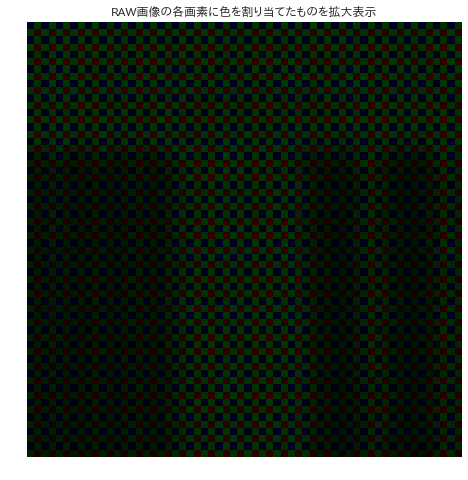

In [20]:
plt.figure(figsize=(8, 8))
# RAW画像の中から(1310, 2620)から32x32の領域を表示。
plt.imshow(raw_color[1340:1400, 2640:2700])
plt.axis('off')
plt.title(u"RAW画像の各画素に色を割り当てたものを拡大表示")
plt.show()

これではなんだかよくわかりません。そういうわけでBayerをフルカラーのRGBに変換する処理が必用になるわけです。

### 簡易デモザイク処理

それではBayer配列からフルカラーの画像を作ってみましょう。

この処理はデモザイクと呼ばれることが多いです。本来デモザイクはカメラ画像処理プロセス（ISP)の肝になる部分で、画質のうち解像感や、偽色などの不快なアーティファクトなどを大きく左右します。 したがって手を抜くべきところではないのですが、今回は簡易処理なので、考えうる限りでもっとも簡単な処理を採用します。

その簡単な処理というのは、3色の情報を持つ最小単位の2x2のブロックから、1画素のみをとりだす、というものです。

![Bayer配列からRGB１画素への簡単な変換](https://github.com/moizumi99/camera_raw_processing/raw/master/Figures/fig2_2.png "Bayer配列からRGB１画素への簡単な変換")

結果として得られる画像サイズは1/4になりますが、もとが24Mもあるので、まだ6M残っていますので簡易処理としては十分でしょう。

なお、解像度低下をともなわないデモザイクアルゴリズムは次章でとりあげます。


では、簡易デモザイク処理してみましょう。なお、2x2ピクセルの中に2画素ある緑は平均値をとります。

今回の処理では２つの緑画素は同じものとして扱うので、bayer配列を0, 1, 2で表しておきましょう。

In [21]:
bayer_pattern = raw.raw_pattern
# Bayer配列を0, 1, 2, 3から0, 1, 2表記に変更
bayer_pattern[bayer_pattern==3] = 1
# 表示して確認
print(bayer_pattern)

[[2 1]
 [1 0]]


では、2x2画素毎に平均をとってRGB画像を作ります。

In [0]:
# RGB画像を容易。サイズは縦横ともRAWデータの半分。
dms_img = np.zeros((h//2, w//2, 3))

# 各画素毎に処理.y, xはRAW画像での位置。
for y in range(0, h, 2):
    for x in range(0, w, 2):
        # bayer_pattern[0, 0]は2x2ブロックの左上の画素の色を示す
        dms_img[y // 2, x // 2, bayer_pattern[0, 0]] += raw_array[y + 0, x + 0]
        # bayer_pattern[0, 1]は2x2ブロックの右上の画素の色を示す
        dms_img[y // 2, x // 2, bayer_pattern[0, 1]] += raw_array[y + 0, x + 1]
        # bayer_pattern[1, 0]は2x2ブロックの左下の画素の色を示す
        dms_img[y // 2, x // 2, bayer_pattern[1, 0]] += raw_array[y + 1, x + 0]
        # bayer_pattern[1, 1]は2x2ブロックの右下の画素の色を示す
        dms_img[y // 2, x // 2, bayer_pattern[1, 1]] += raw_array[y + 1, x + 1]
        # 緑画素は２つあるので平均を取る
        dms_img[y // 2, x // 2, 1] /= 2

できあがった画像を見てみましょう。

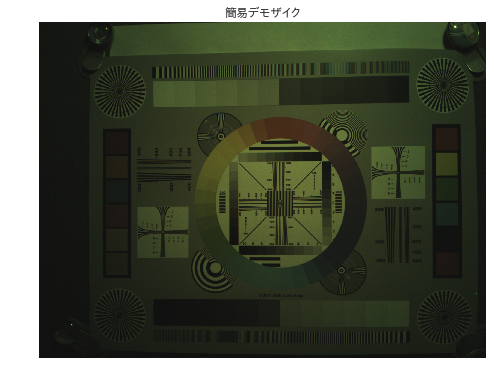

In [23]:
# 画像を0と1の間でノーマライズ
dms_img[dms_img < 0] = 0
dms_img /= 1024
# 表示
plt.figure(figsize=(8, 8))
plt.imshow(dms_img)
plt.axis('off')
plt.title(u"簡易デモザイク")
plt.show()

このようにRGBのフルカラー画像を作ることができました。

まだ色が正しくない、全体的に暗い、などの問題があります。次の節でこのあたりを修正していきます。

### 処理の高速化

上記のコードは、画像処理とコードの対応がわかりやすいように各画素ごとの処理をループを使って記述してあります。

これは処理の内容はわかりやすいのですが、numpyの高速性を十分に活用しておらず、かなり遅い処理になっています。このコードをnumpyの機能を利用して書き直すとこのようになります。

In [0]:
def simple_demosaic(raw_array, bayer_pattern):
    """
    簡易デモザイク処理を行う。

    Parameters
    ----------
    raw_array: numpy array
        入力BayerRAW画像データ
    bayer_pattern: int[2, 2]
        ベイヤーパターン。0:赤、1:緑、2:青、3:緑。

    Returns

    -------
    dms_img: numpy array
        出力RGB画像。サイズは入力の縦横共に1/2。
    """
    height, width = raw_array.shape
    dms_img = np.zeros((height//2, width//2, 3))
    bayer_pattern[bayer_pattern == 3] = 1
    dms_img[:, :, bayer_pattern[0, 0]] = raw_array[0::2, 0::2]
    dms_img[:, :, bayer_pattern[0, 1]] += raw_array[0::2, 1::2]
    dms_img[:, :, bayer_pattern[1, 0]] += raw_array[1::2, 0::2]
    dms_img[:, :, bayer_pattern[1, 1]] += raw_array[1::2, 1::2]
    dms_img[:, :, 1] /= 2
    return dms_img

処理の内容としては最初のループを使ったコードと同じですが、速度は格段に上がっています。

同じ画像になったか確認してみましょう。

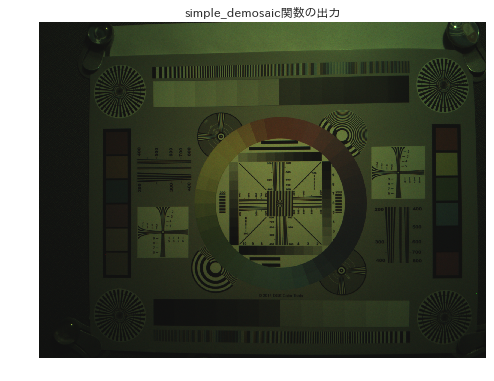

In [25]:
dms_img = simple_demosaic(raw_array, raw.raw_pattern)

# 画像を0と1の間でノーマライズ
dms_img[dms_img < 0] = 0
dms_img /= 1024
# 表示
plt.figure(figsize=(8, 8))
plt.imshow(dms_img)
plt.axis('off')
plt.title(u"simple_demosaic関数の出力")
plt.show()

同様の画像が出力されたようです。

### この節のまとめ

RAW画像に対して簡易デモザイク処理を行いました。次はホワイトバランス補正を行います。

## 3.3 ホワイトバランス補正

### ホワイトバランス補正とは

ホワイトバランス補正とは、センサーの色ごとの感度や、光のスペクトラムなどの影響を除去して、本来の白を白として再現するための処理です。 
そのためには各色の画素に、別途計算したゲイン値をかけてあげます。

実際のカメラではホワイトバランスの推定はAWB（オートホワイトバランス）と呼ばれる複雑な処理によって行いますが、今回はカメラが撮影時に計算したゲイン値をRAWファイルから抽出して使います。

### ホワイトバランス補正とは

ホワイトバランス補正とは、センサーの色ごとの感度や、光のスペクトラムなどの影響を除去して、本来の白を白として再現するための処理です。 
そのためには各色の画素に、別途計算したゲイン値をかけてあげます。

実際のカメラではホワイトバランスの推定はAWB（オートホワイトバランス）と呼ばれる複雑な処理によって行いますが、今回はカメラが撮影時に計算したゲイン値をRAWファイルから抽出して使います。

### ホワイトバランス補正処理

ますはどんなホワイトバランス値かみてみましょう。RAWファイルの中に記録されたゲインを見てみましょう。

rawpyのアトリビュートcamera_whitebalanceを使います

In [26]:
wb = raw.camera_whitebalance
print(wb)

[1.128000020980835, 1.0, 2.5460000038146973, 1.0]


これは、赤、緑（赤と同じ行）、青、緑（青と同じ行）のゲインがそれぞれ、1.128、1.0、2.546、1.0ということをあらわしています。

緑のゲインは1.0倍なので、赤、青をそれぞれ、1.128倍、2.546倍にしてやればカラーバランスが取れることがわかります。

処理してみましょう。

In [0]:
# 元のRAWデータをコピーします。
wb_img = raw_array.copy()
# RAWデータのベイヤーパターン。
bayer_pattern = raw.raw_pattern
for y in range(0, h):
    for x in range(0, w):
        # cは画素に対応する色チャンネル
        c = bayer_pattern[y % 2, x % 2]
        # 各画素に画素の色に対応するゲインをかけ合わせる
        wb_img[y, x] *= wb[c]

これでホワイトバランスがそろったかみてみましょう。
3.2で使用した簡易デモザイクを使って表示します。

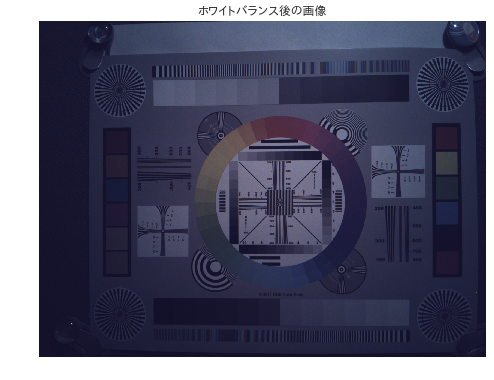

In [28]:
# 簡易デモザイク。
dms_img = simple_demosaic(wb_img, raw.raw_pattern)

# 画像を0と1の間でノーマライズ
dms_img /= 1024
dms_img[dms_img < 0] = 0
dms_img[dms_img > 1] = 1.0
# 表示
plt.figure(figsize=(8, 8))
plt.imshow(dms_img)
plt.axis('off')
plt.title(u"ホワイトバランス後の画像")
plt.show()

これでだいぶ色味がよくなりました。

しかしまだ青みが強い画像になっています。ブラックレベルの補正がされていないために色ズレがおきてしまったのだと思われます。ブラックレベル補正は次の節で扱います

### 処理の高速化

先程扱ったホワイトバランスの処理はコードの読みやすさを優先したものなので低速です。

numpyの機能を利用して高速化した関数は次のようになります。

In [0]:
def white_balance(raw_array, wb_gain, raw_colors):
    """
    ホワイトバランス補正処理を行う。

    Parameters
    ----------
    raw_array: numpy array
        入力BayerRAW画像データ。
    wb_gain: float[4]
        ホワイトバランスゲイン。
    raw_colors: int[h, w]
        RAW画像のカラーチャンネルマトリクス。

    Returns
    -------
    wb_img: numpy array
        出力RAW画像。
    """
    norm = wb_gain[1]
    gain_matrix = np.zeros(raw_array.shape)
    for color in (0, 1, 2, 3):
        gain_matrix[raw_colors == color] = wb_gain[color] / norm
    wb_img = raw_array * gain_matrix
    return wb_img

この関数を使ってホワイトバランス処理を行うにはこのように書きます。

In [0]:
wb_img = white_balance(raw_array, raw.camera_whitebalance, raw.raw_colors)

簡易デモザイク処理を行って確認しましょう。

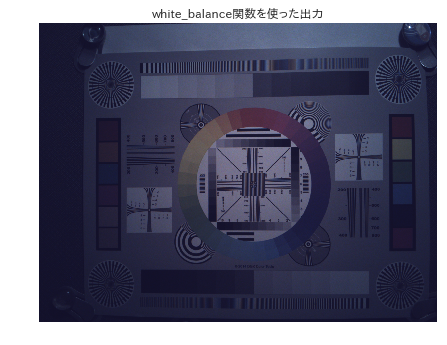

In [31]:
# 簡易デモザイク。
dms_img = simple_demosaic(wb_img, raw.raw_pattern)

# 画像を0と1の間でノーマライズ
dms_img /= 1024
dms_img[dms_img < 0] = 0
dms_img[dms_img > 1] = 1.0
# 表示
plt.imshow(dms_img)
plt.axis('off')
plt.title(u"white_balance関数を使った出力")
plt.show()

同様の画像が出力されたようです。

### この節のまとめ

この節ではホワイトバランスの調整を行いました。次はブラックレベル補正を行い色再現を向上します。

## 3.4 ブラックレベル補正

### ブラックレベル補正とは

RAWデータの黒に対応する値は通常０より大きくなっています。

これは、センサーの読み出しノイズがマイナスの値を取ることがあるために、画像の値を０以上にしてしまうとノイズのクリッピングがおきて非常に暗い領域で色ズレがおきてしまうためです。

したがって正しい画像処理を行うにはブラックレベルを調整して置かなくてはなりません。これをやって置かないと黒が十分黒くないカスミがかかったような眠い画像になってしまいますし、色もずれてしまいます。

### ブラックレベル補正処理

ますはどんなブラックレベル値かみてみましょう。

まずrawpyのアトリビュートを使ってブラックレベルを確認しましょう。

In [32]:
blc = raw.black_level_per_channel
print(blc)

[66, 66, 66, 66]


これは全チャンネルでブラックレベルは66であるという事をしめしています。

今回は全チャンネルで同じ値でしたが他のRAWファイルでもこのようになっているとは限りません。各画素ごとのチャンネルに対応した値を引くようにしておきましょう。

In [0]:
# ベイヤー配列パターンを変数に保存
bayer_pattern = raw.raw_pattern

# RAWデータを符号付き整数としてコピー。
blc_raw = raw_array.astype('int')
# 各画素毎に対応するブラックレベルを参照して引いていく。
for y in range(0, h, 2):
    for x in range(0, w, 2):
        blc_raw[y + 0, x + 0] -= blc[bayer_pattern[0, 0]]
        blc_raw[y + 0, x + 1] -= blc[bayer_pattern[0, 1]]
        blc_raw[y + 1, x + 0] -= blc[bayer_pattern[1, 0]]
        blc_raw[y + 1, x + 1] -= blc[bayer_pattern[1, 1]]

処理が正常に行われたか最大値と最小値を比較して確認しておきましょう。

In [34]:
print("ブラックレベル補正前: 最小値=", raw_array.min(), ", 最大値=", raw_array.max())
print("ブラックレベル補正前: 最小値=", blc_raw.min(), ", 最大値=", blc_raw.max())

ブラックレベル補正前: 最小値= 53 , 最大値= 1023
ブラックレベル補正前: 最小値= -13 , 最大値= 957


最大値最小値ともちょうと66減っています。これで全ての値が66減少している事が示せたわけではありませんが、処理が正しく行われている可能性は高そうです。


### ブラックレベル後の画像の確認

ホワイトバランスと簡易デモザイク処理を行って、ブラックレベルが正常に補正されたか確認しましょう。

In [0]:
# 最初に定義したwhite_balance()関数を使って、ホワイトバランス調整。
wb_img = white_balance(blc_raw, raw.camera_whitebalance, raw.raw_colors)
# simple_demosaic()関数を使って、簡易デモザイク処理。
dms_img = simple_demosaic(wb_img, raw.raw_pattern)

では、処理の結果を見てみましょう。

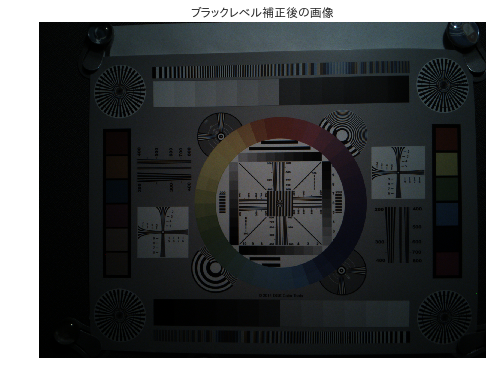

In [36]:
# 表示
plt.figure(figsize=(8, 8))
# imshowでは画像は0から1.0の値をとる必用があるので、ノーマライズする。
dms_img /= 1024
dms_img[dms_img<0] = 0
dms_img[dms_img>1] = 1
# 画像表示
plt.imshow(dms_img)
plt.axis('off')
plt.title(u"ブラックレベル補正後の画像")
plt.show()

だいぶきれいになりました。
前回問題だった青みがかった色も集成されています。後は画像全体の暗さを直す必用がありそうです。これは次の節で扱うガンマ補正で修正できます。

### 処理の高速化

今回のブラックレベル補正処理も、コードの読みやすさを優先して非常に遅いものになっています。

numpyの機能を利用して高速化すると次のようになります。

In [0]:
def black_level_correction(raw_array, blc, bayer_pattern):
    """ 
    ブラックレベル補正処理を行う。
    
    Parameters
    ----------
    raw_array: numpy array
        入力BayerRAW画像データ。
    blc: float[4]
        各カラーチャンネルごとのブラックレベル。
    bayer_pattern: int[2, 2]
        ベイヤーパターン。0:赤、1:緑、2:青、3:緑。
        
    Returns
    -------
    blc_raw: numpy array
        出力RAW画像。
    """    
    # 符号付き整数として入力画像をコピー
    blc_raw = raw_array.astype('int')
    # 各カラーチャンネル毎にブラックレベルを引く。
    blc_raw[0::2, 0::2] -= blc[bayer_pattern[0, 0]]
    blc_raw[0::2, 1::2] -= blc[bayer_pattern[0, 1]]
    blc_raw[1::2, 0::2] -= blc[bayer_pattern[1, 0]]
    blc_raw[1::2, 1::2] -= blc[bayer_pattern[1, 1]]
    return blc_raw

簡易デモザイク処理などを使ってこの関数の動作を確認しましょう。

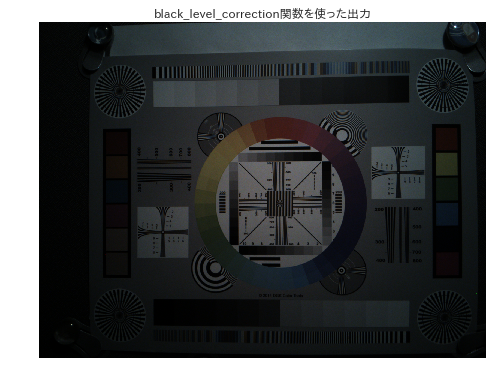

In [38]:
# 上記のblack_level_correction関数を使用してブラックレベル補正。
blc_raw = black_level_correction(raw_array, blc, raw.raw_pattern)
# 最初に定義したwhite_balance()関数を使って、ホワイトバランス調整。
wb_img = white_balance(blc_raw, raw.camera_whitebalance, raw.raw_colors)
# simple_demosaic()関数を使って、簡易デモザイク処理。
dms_img = simple_demosaic(wb_img, raw.raw_pattern)

# 表示
plt.figure(figsize=(8, 8))
# imshowでは画像は0から1.0の値をとる必用があるので、ノーマライズする。
dms_img /= 1024
dms_img[dms_img<0] = 0
dms_img[dms_img>1] = 1
# 画像表示
plt.imshow(dms_img)
plt.axis('off')
plt.title(u"black_level_correction関数を使った出力")
plt.show()

同様の画像が出力されたようです。

### まとめ

この節ではブラックレベル補正を行いました。次はガンマ補正を行い明るさとトーンを補正します。

## 3.5 ガンマ補正

### ガンマ補正とは

ガンマ補正というのは、もともとテレビがブラウン管だった頃にテレビの出力特性と信号の強度を調整するために使われていたものです。 

今でも残っているのは、ガンマ補正による特性が結果的に人間の目の非線形的な感度と相性が良かったからのようです。 そんなわけで現在でもディスプレイの輝度は信号に対してブラウン管と似たような信号特性を持って作られており、画像にはガンマ補正をかけておかないと出力は暗い画像になってしまいます。

ガンマ特性自体は次の式で表されます

$$ y = x^{2.2} $$

グラフで書くと次のようになります。

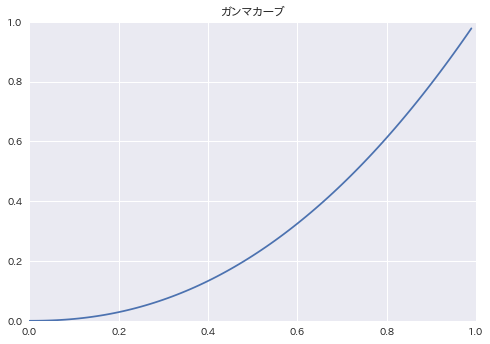

In [39]:
# 0~1.0の範囲の値を0.01刻みで作る。
xs = np.arange(0.0, 1.0, 0.01)
# xsに対応したx^2.2の値を作る。
ys = np.power(xs, 2.2)
# Pyplotの機能でグラフ表示。
plt.plot(xs, ys)
# ｘ軸とｙ軸の範囲を0-1.0に設定。
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.title(u"ガンマカーブ")
plt.show()

モニターなどの出力の強さはは入力に対してこのような特性になるので、入力の方をこれに合わせて調整しておく必用があります。これがガンマ補正です。

ガンマ補正はこれを打ち消す必要があるので、このような式になります。

$$ y = x^{\frac{1}{2.2}} $$

グラフはこうなります。

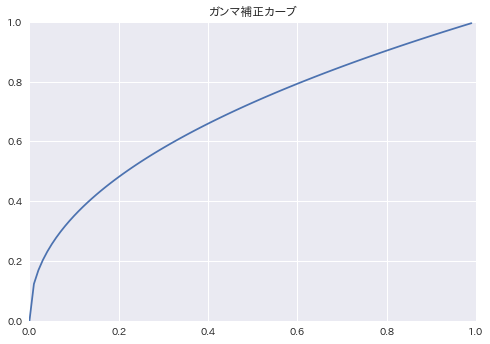

In [40]:
xs = np.arange(0.0, 1.0, 0.01)
ys = np.power(xs, 1/2.2)
plt.plot(xs, ys)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.title(u"ガンマ補正カーブ")
plt.show()

### ガンマ補正処理

それではガンマ補正をかけてみましょう。

ガンマをかけるのはデモザイクまで行ったRGB画像が対象ですので、まずブラックレベル補正、ホワイトバランス補正、簡易デモザイク処理をかけます。

In [0]:
# raw_processからインポートしたblack_level_correction関数を使用してブラックレベル補正。
blc_raw = black_level_correction(raw_array, raw.black_level_per_channel, raw.raw_pattern)
# raw_processからインポートしたwhite_balance()関数を使って、ホワイトバランス調整。
wb_img = white_balance(blc_raw, raw.camera_whitebalance, raw.raw_colors)
# raw_processからインポートしたsimple_demosaic()関数を使って、簡易デモザイク処理。
dms_img = simple_demosaic(wb_img, raw.raw_pattern)

正常に処理できているか確認しておきましょう。

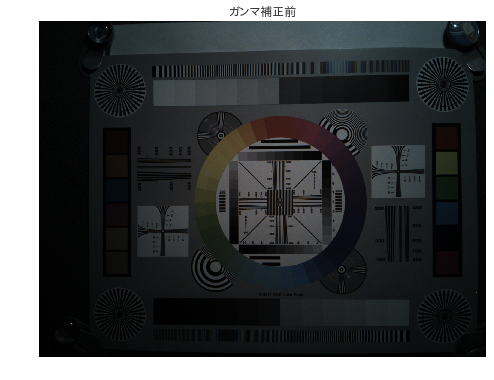

In [42]:
# 表示
plt.figure(figsize=(8, 8))
# imshowでは画像は0から1.0の値をとる必用があるので、ノーマライズする。
img = dms_img.copy()
img /= 1024
img[img<0] = 0
img[img>1] = 1
plt.imshow(img)
plt.axis('off')
plt.title(u"ガンマ補正前")
plt.show()

デモザイクまでの処理は正常に行われたようです。次は実際にガンマ補正をかけてみましょう。

In [0]:
# デモザイク後の画像をfloatタイプとしてコピー。
gamma_img = dms_img.astype(float)
# ガンマ関数は0-1の範囲で定義されているので、その範囲に正規化する。
gamma_img[gamma_img < 0] = 0
gamma_img /= gamma_img.max()
# numpyのpower関数を使って、ガンマ関数を適用。
gamma_img = np.power(gamma_img, 1/2.2)

処理の結果を見てみましょう。

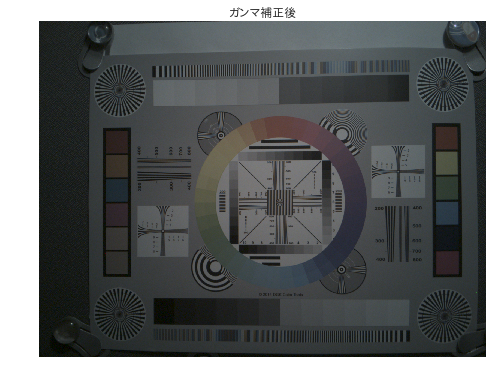

In [44]:
# 表示
plt.figure(figsize=(8, 8))
plt.imshow(gamma_img)
plt.axis('off')
plt.title(u"ガンマ補正後")
plt.show()

ガンマ補正により明るさが適正になりました。

### 処理のモジュール化

今回のガンマ補正も関数にしておきましょう。

In [0]:
def gamma_correction(input_img, gamma):
    """
    ガンマ補正処理を行う。

    Parameters
    ----------
    input_img: numpy array [h, w, 3]
        入力RGB画像データ。
        0-1の範囲で正規化されていること。
    gamma: float
        ガンマ補正値。通常は2.2。

    Returns
    -------
    gamma_img: numpy array [h, 2, 3]
        出力RGB画像。
    """
    # デモザイク後の画像をfloatタイプとしてコピー。
    gamma_img = input_img.copy()
    gamma_img[gamma_img < 0] = 0
    gamma_img[gamma_img > 1] = 1.0
    # numpyのpower関数を使って、ガンマ関数を適用。
    gamma_img = np.power(gamma_img, 1/gamma)
    return gamma_img

なお、このgamma_correction()を含めこの章で扱った関数ははraw_process.pyモジュールの一部としてgithubにアップロードされています。 使用する場合は、

```
!wget https://raw.githubusercontent.com/moizumi99/camera_raw_processing/master/raw_process.py
```

としてダウンロードした後、


```
import raw_process
```


としてインポートしてください。

In [46]:
! wget https://raw.githubusercontent.com/moizumi99/camera_raw_processing/master/raw_process.py

import raw_process

--2019-03-02 19:39:32--  https://raw.githubusercontent.com/moizumi99/camera_raw_processing/master/raw_process.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17130 (17K) [text/plain]
Saving to: ‘raw_process.py’

raw_process.py      100%[===================>]  16.73K  --.-KB/s    in 0.01s   

2019-03-02 19:39:32 (1.34 MB/s) - ‘raw_process.py’ saved [17130/17130]



実際に使用するにはこのようにします。

In [0]:
# raw_processのblack_level_correction関数を使用してブラックレベル補正。
blc_raw = raw_process.black_level_correction(raw_array, raw.black_level_per_channel, raw.raw_pattern)
# raw_processのwhite_balance()関数を使って、ホワイトバランス調整。
wb_img = raw_process.white_balance(blc_raw, raw.camera_whitebalance, raw.raw_colors)
# raw_processのsimple_demosaic()関数を使って、簡易デモザイク処理。
dms_img = raw_process.simple_demosaic(wb_img, raw.raw_pattern)
# raw_processのgamma_correction()関数を使って、ガンマ補正
gmm_img = raw_process.gamma_correction(dms_img, 2.2)

表示してみます。

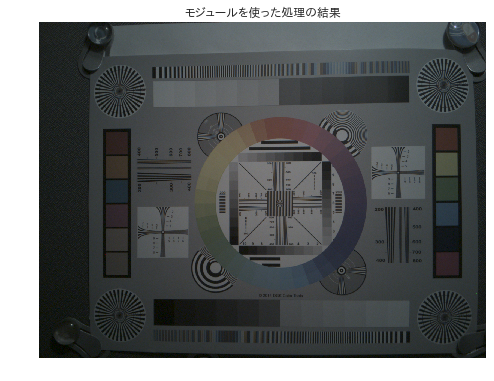

In [48]:
# 表示
plt.figure(figsize=(8, 8))
plt.imshow(gamma_img)
plt.axis('off')
plt.title(u"モジュールを使った処理の結果")
plt.show()

先ほどと同じ画像ができました。

### まとめ

この節ではガンマ補正を行いました。またこの章で扱った処理をモジュールのメソッドとして登録しました。

これで基本的な処理はすべておわりです。
次の章ではその他の[重要な処理](http://bit.ly/raw_chap_4)を扱います。